In [14]:
import numpy as np

# Constants
LIGHT_SPEED = 3e8  # Speed of light in m/s

def FSPL(distance, frequency):
    """
    Calculate the free space path loss (FSPL).
    
    Parameters:
    - distance: Distance from transmitter to receiver in kilometers
    - frequency: Frequency of the signal in GHz
    
    Returns:
    - fspl: Free space path loss in dB
    """
    frequency=frequency*1e9
    distance=distance*1e3
    wavelength = LIGHT_SPEED / frequency
    fspl = (4 * np.pi * distance / wavelength) ** 2
    fspl_db = 10 * np.log10(fspl)
    return fspl_db

FSPL(20,30)



148.00479719372154

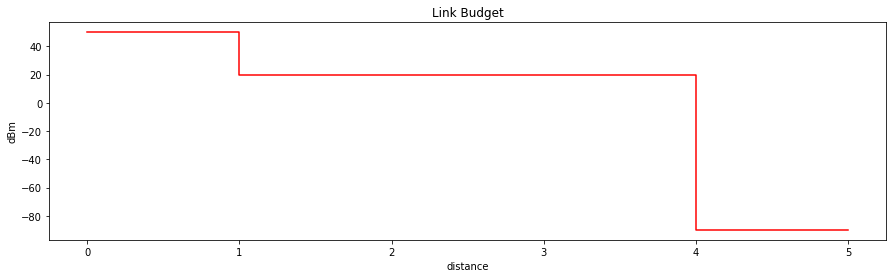

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define the parameters for the plot based on the provided image
# tx_power = 51.32  # Example Tx Power in dBm
# eirp = 20  # Example EIRP in dBm
tx_eirp = 51.32
rx_sensitivity = -100  # Example Rx Sensitivity in dBm
margin = 10  # Example Margin in dB
rx_power = rx_sensitivity + margin  # Calculated Rx Power in dBm

# Define the distances for each segment based on the provided image
d1 = 1  # Distance before EIRP drop
d2 = 3  # Distance after EIRP drop to before Rx Power rise
d3 = 1  # Distance after Rx Power rise

# Define the distances array
# distances = np.array([0, d1, d1, d1 + d2, d1 + d2, d1 + d2 + d3])
distances = np.array([0, d1, d1, d1 + d2, d1 + d2, d1 + d2 + d3])

# Define the power levels corresponding to the distances
power_levels = np.array([tx_power, tx_power, eirp, eirp, rx_power, rx_power])

# Plot the link budget graph
plt.figure(figsize=(15, 4))
plt.plot(distances, power_levels, drawstyle='steps-post', color='red')

# Add annotations for Tx Power and Rx Sensitivity
# plt.text(0, tx_power, 'Tx Power', verticalalignment='bottom', horizontalalignment='center')
# plt.text(distances[-1], rx_sensitivity, 'Rx Sensitivity', verticalalignment='bottom', horizontalalignment='right')
# plt.text(distances[-1], rx_power, 'Rx Power', verticalalignment='bottom', horizontalalignment='right')
# plt.text(distances[-1], rx_power + margin, 'Margin', verticalalignment='bottom', horizontalalignment='right')

# Add arrows
# plt.annotate('', xy=(d1, tx_power), xytext=(d1, eirp),
#              arrowprops=dict(arrowstyle="<->", color='green'))
# plt.annotate('', xy=(d1 + d2, eirp), xytext=(d1 + d2, rx_power),
#              arrowprops=dict(arrowstyle="<->", color='green'))

# Set the y-axis to show the dBm scale
plt.ylabel('dBm')

# Set the x-axis to show the distance scale
plt.xlabel('distance')

# Set the title of the plot
plt.title('Link Budget')

# Display the plot
plt.show()


In [38]:
import numpy as np
import math

def calculate_snr(data_rate, bandwidth, packet_size, per):
    # Calculate the Shannon Limit
    snr_shannon = (2 ** (data_rate / bandwidth)) - 1

    # Approximate BER from PER
    bits_per_packet = packet_size * 8  # Convert packet size from bytes to bits
    ber = 1 - (1 - per) ** (1 / bits_per_packet)

    # Adjust SNR based on BER (this part is quite simplified and may vary in real scenarios)
    snr_adjusted = math.log10(snr_shannon * (ber * 100))  # This adjustment factor is a placeholder
    
    return snr_adjusted

# Example Usage
data_rate = 10e6  # 10 Mbps
bandwidth = 5.12e6   # 5 MHz
packet_size = 7680/8 
per = 0.1        # 1% Packet Error Rate

required_snr = calculate_snr(data_rate, bandwidth, packet_size, per)
print("Required SNR (dB):", required_snr)


Required SNR (dB): -2.4044831879476183
